# Erik ten Hag Analysis

## Introduction

On Thursday 21 April 2022, Erik ten Hag, a Dutch manager who had a very successful run in many clubs in the Eredivisie (Dutch football league), was appointed as the new manager for Manchester United. As of august 2024, ten Hag has managed 2 Manchester United 2 seasons. In his first season, ten Hag led Man Utd to a 3rd place finish with 75 points qualifying them to UEFA Champions League competition, had a quarter final finish in the UEFA Europa League, got to the FA cup final where they lost a 1-2 defeat to Manchester City and won the Carabao Cup against Newcastle. This first season, for most fans and people outside the club was considered a success, ending the 6 year trophy drought that haunted them while also qualifying for the Champions League (Europe's most prestigious competition).

However, in his 2nd season, thing were vastly more controversial. He started his campaign with a horrible Champions League display, ending last place in the group stage, finishing 8th in the premier league, crashing out the Carabao Cup in the 4th round, but won the FA cup against rivals Manchester City 2-1.


Because of this tumultuous season, ten Hag and Manchester United have mounted huge amounts of pressure with most analysts and TV pundits predicting he would get fired before or after the season ended. 


This project looks to analyze ten Hag's performance over his tenure and answer the question: Is he not the right manager for Manchester United, or is the media and public unfairly judging him and not giving him enough time to nourish his project? To answer this question, this analysis is divided in 4 main sections:
- Exploratory Data Analysis and cleaning.
- Deep dive into ten Hag and his statistics across his 2 seasons.
- Comparing ten Hag to previous Manchester United managers.
- Comparing ten Hag to the first 2 seasons of Jurgen Klopp at Liverpool, Josep Guardiola at Manchester City and Mikel Arteta at Arsenal.



#### Note
Data obtained was web scraped with a separate python code 

## Assumptions for the analysis

- Michael Carrick and Ryan Giggs will not be taken into account since they had less than 5 games played
- For the goals in favour/against, the penalties and aggregate scores will not be taken into account. Only the goals scored in regular time will be taken into account
- No draw is allowed in knockout stages for cup games. The winner will be declared after the penalty shootout if required
- The managers in consideration go from Sir Alex Ferguson to present time

In [1]:
import numpy as np
import pandas as pd
from get_data import get_data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Data import and EDA

In [2]:
raw_data = pd.read_csv('man_utd_data.csv')

In [3]:
raw_data.tail()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager
2128,2128,2024-05-06,Crystal Palace v Manchester United,L,4-0,Premier League,Erik ten Hag
2129,2129,2024-05-12,Manchester United v Arsenal,L,0-1,Premier League,Erik ten Hag
2130,2130,2024-05-15,Manchester United v Newcastle United,W,3-2,Premier League,Erik ten Hag
2131,2131,2024-05-19,Brighton and Hove Albion v Manchester United,W,0-2,Premier League,Erik ten Hag
2132,2132,2024-05-25,Manchester City v Manchester United,W,1-2,FA Cup,Erik ten Hag


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2133 non-null   int64 
 1   Date         2133 non-null   object
 2   Match        2133 non-null   object
 3   Result       2133 non-null   object
 4   Score        2133 non-null   object
 5   Competition  2133 non-null   object
 6   manager      2116 non-null   object
dtypes: int64(1), object(6)
memory usage: 116.8+ KB


In [5]:
# checking for null values
raw_data.isna().sum()

Unnamed: 0      0
Date            0
Match           0
Result          0
Score           0
Competition     0
manager        17
dtype: int64

In [6]:
# checking the null values
raw_data[raw_data.isna().any(axis=1)]

,Unnamed: 0,Date,Match,Result,Score,Competition,manager
0,0,1986-08-23,Arsenal v Manchester United,L,1-0,League Division One,NaN
1,1,1986-08-25,Manchester United v West Ham United,L,2-3,League Division One,NaN
2,2,1986-08-30,Manchester United v Charlton Athletic,L,0-1,League Division One,NaN
3,3,1986-09-06,Leicester City v Manchester United,D,1-1,League Division One,NaN
4,4,1986-09-13,Manchester United v Southampton,W,5-1,League Division One,NaN
5,5,1986-09-16,Watford v Manchester United,L,1-0,League Division One,NaN
6,6,1986-09-21,Everton v Manchester United,L,3-1,League Division One,NaN
7,7,1986-09-24,Manchester United v Port Vale,W,2-0,League Cup,NaN
8,8,1986-09-28,Manchester United v Chelsea,L,0-1,League Division One,NaN
9,9,1986-10-04,Nottingham Forest v Manchester United,D,1-1,League Division One,NaN


In [7]:
# The oldest manager for this analysis is Sir Alex Ferguson, and since he was appointed in 06 Nov, 1986; all dates prior to this will be eliminated
data_no_null = raw_data.dropna()
data_no_null.head() 

,Unnamed: 0,Date,Match,Result,Score,Competition,manager
17,17,1986-11-08,Oxford United v Manchester United,L,2-0,League Division One,Alex Ferguson
18,18,1986-11-15,Norwich City v Manchester United,D,0-0,League Division One,Alex Ferguson
19,19,1986-11-22,Manchester United v Queens Park Rangers,W,1-0,League Division One,Alex Ferguson
20,20,1986-11-29,Wimbledon v Manchester United,L,1-0,League Division One,Alex Ferguson
21,21,1986-12-07,Manchester United v Tottenham Hotspur,D,3-3,League Division One,Alex Ferguson


In [8]:
data_no_null.isna().sum()

Unnamed: 0     0
Date           0
Match          0
Result         0
Score          0
Competition    0
manager        0
dtype: int64

In [9]:
data_no_null['Result'].unique()

array(['L', 'D', 'W'], dtype=object)

In [10]:
data_no_null['Score'].unique()

array(['2-0', '0-0', '1-0', '3-3', '0-1', '4-1', '1-1', '3-1', '2-1',
       '3-2', '4-0', '2-2', '1-3', '5-0', '0-1Agg: 0-6', '2-4', '1-2',
       '0-2', '3-0', '5-0Agg: 6-0', '5-1', '2-3', '0-0Agg: 3-2', '1-4',
       '0-3', '0-1Agg: 0-3', '2-1Agg: 5-2', '0-2Agg: 0-5', '2-6',
       '0-1Agg: 1-3', '0-2Agg: 1-3', '1-1Agg: 4-2', '2-0Agg: 2-0',
       '1-1Agg: 1-4', '3-6', '2-2 (2-4)', '2-1Agg: 2-1',
       '0-0Agg: 0-0 (4-3)', '1-0Agg: 2-1', '1-1 (4-5)', '4-2',
       '2-1Agg: 5-3', '2-0Agg: 3-2', '0-0Agg: 3-3', '2-5', '1-4Agg: 1-5',
       '2-0Agg: 4-1', '5-2', '9-0', '0-4', '2-2Agg: 2-2', '1-3Agg: 4-3',
       '0-6', '6-3', '0-0Agg: 0-4', '0-1Agg: 0-2', '1-1 (2-4)', '7-0',
       '6-1', '3-5', '1-1Agg: 1-1', '0-0Agg: 0-2', '1-8', '1-1Agg: 1-3',
       '2-3Agg: 3-4', '7-1', '3-4', '2-3Agg: 2-3', '6-0', '2-1Agg: 3-1',
       '4-3', '3-2Agg: 5-2', '1-1Agg: 3-3', '5-0Agg: 5-1', '5-3',
       '1-3Agg: 2-4', '4-3Agg: 5-6', '1-1 (4-3)', '1-1Agg: 2-3',
       '3-0Agg: 5-1', '6-2', '1-2Agg: 1

In [11]:
data_no_null['Competition'].unique()

array(['League Division One', 'FA Cup', 'League Cup', 'FA Charity Shield',
       'UEFA European Cup Winners Cup', 'UEFA Super Cup',
       'Premier League', 'UEFA Cup', 'UEFA Champions League',
       'Intercontinental Cup', 'FIFA Club World Cup',
       'FA Community Shield', 'UEFA Europa League'], dtype=object)

In [12]:
data_no_null['manager'].unique()

array(['Alex Ferguson', 'David Moyes', 'Ryan Giggs', 'Louis van Gaal',
       'Jose Mourinho', 'Ole Gunnar Solskjaer', 'Michael Carrick',
       'Ralf Rangnick', 'Erik ten Hag'], dtype=object)

In [13]:
data_no_null.groupby(by='manager').count().sort_values(by='Date',ascending=False)

,Unnamed: 0,Date,Match,Result,Score,Competition
manager,,,,,,
Alex Ferguson,1499,1499,1499,1499,1499,1499
Ole Gunnar Solskjaer,168,168,168,168,168,168
Jose Mourinho,144,144,144,144,144,144
Erik ten Hag,114,114,114,114,114,114
Louis van Gaal,103,103,103,103,103,103
David Moyes,52,52,52,52,52,52
Ralf Rangnick,29,29,29,29,29,29
Ryan Giggs,4,4,4,4,4,4
Michael Carrick,3,3,3,3,3,3


In [14]:
# since michael carrick and ryan giggs were both interrim managers with less than 10 games played, i'll remove them from the analysis
manager_df = data_no_null.copy()
manager_df = manager_df.drop(manager_df[(manager_df.manager == 'Michael Carrick') | (manager_df.manager == 'Ryan Giggs')].index)
manager_df['manager'].unique()

array(['Alex Ferguson', 'David Moyes', 'Louis van Gaal', 'Jose Mourinho',
       'Ole Gunnar Solskjaer', 'Ralf Rangnick', 'Erik ten Hag'],
      dtype=object)

## Preprocessing

In [15]:
# creating the home and away columns
manager_df[['home','away']] = manager_df['Match'].str.split(pat = ' v ', n = 1, expand = True)

manager_df.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home,away
17,17,1986-11-08,Oxford United v Manchester United,L,2-0,League Division One,Alex Ferguson,Oxford United,Manchester United
18,18,1986-11-15,Norwich City v Manchester United,D,0-0,League Division One,Alex Ferguson,Norwich City,Manchester United
19,19,1986-11-22,Manchester United v Queens Park Rangers,W,1-0,League Division One,Alex Ferguson,Manchester United,Queens Park Rangers
20,20,1986-11-29,Wimbledon v Manchester United,L,1-0,League Division One,Alex Ferguson,Wimbledon,Manchester United
21,21,1986-12-07,Manchester United v Tottenham Hotspur,D,3-3,League Division One,Alex Ferguson,Manchester United,Tottenham Hotspur


In [16]:
# home and away goals
def split_scores(score):
    home_score = int(score[0])
    away_score = int(score[2])
    
    return home_score, away_score
                
manager_df[['home_score','away_score']] = manager_df['Score'].apply(split_scores).apply(pd.Series)

manager_df.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home,away,home_score,away_score
17,17,1986-11-08,Oxford United v Manchester United,L,2-0,League Division One,Alex Ferguson,Oxford United,Manchester United,2,0
18,18,1986-11-15,Norwich City v Manchester United,D,0-0,League Division One,Alex Ferguson,Norwich City,Manchester United,0,0
19,19,1986-11-22,Manchester United v Queens Park Rangers,W,1-0,League Division One,Alex Ferguson,Manchester United,Queens Park Rangers,1,0
20,20,1986-11-29,Wimbledon v Manchester United,L,1-0,League Division One,Alex Ferguson,Wimbledon,Manchester United,1,0
21,21,1986-12-07,Manchester United v Tottenham Hotspur,D,3-3,League Division One,Alex Ferguson,Manchester United,Tottenham Hotspur,3,3


In [17]:
# goal difference calculator
def goal_difference(row: pd.Series, team: str):
    g_diff = 0
    if row['home'] == team:
        g_diff = row['home_score'] - row['away_score']
    else:
        g_diff = row['away_score'] - row['home_score']
    
    return g_diff

manager_df['goal_difference'] = manager_df.apply(goal_difference,team='Manchester United',axis=1)
manager_df.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home,away,home_score,away_score,goal_difference
17,17,1986-11-08,Oxford United v Manchester United,L,2-0,League Division One,Alex Ferguson,Oxford United,Manchester United,2,0,-2
18,18,1986-11-15,Norwich City v Manchester United,D,0-0,League Division One,Alex Ferguson,Norwich City,Manchester United,0,0,0
19,19,1986-11-22,Manchester United v Queens Park Rangers,W,1-0,League Division One,Alex Ferguson,Manchester United,Queens Park Rangers,1,0,1
20,20,1986-11-29,Wimbledon v Manchester United,L,1-0,League Division One,Alex Ferguson,Wimbledon,Manchester United,1,0,-1
21,21,1986-12-07,Manchester United v Tottenham Hotspur,D,3-3,League Division One,Alex Ferguson,Manchester United,Tottenham Hotspur,3,3,0


# Erik Ten Hag 

## Overview of his tenure

In [18]:
eth = manager_df[manager_df['manager'] == 'Erik ten Hag']
eth.reset_index(drop=True,inplace=True)
eth.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home,away,home_score,away_score,goal_difference
0,2019,2022-08-07,Manchester United v Brighton and Hove Albion,L,1-2,Premier League,Erik ten Hag,Manchester United,Brighton and Hove Albion,1,2,-1
1,2020,2022-08-13,Brentford v Manchester United,L,4-0,Premier League,Erik ten Hag,Brentford,Manchester United,4,0,-4
2,2021,2022-08-22,Manchester United v Liverpool,W,2-1,Premier League,Erik ten Hag,Manchester United,Liverpool,2,1,1
3,2022,2022-08-27,Southampton v Manchester United,W,0-1,Premier League,Erik ten Hag,Southampton,Manchester United,0,1,1
4,2023,2022-09-01,Leicester City v Manchester United,W,0-1,Premier League,Erik ten Hag,Leicester City,Manchester United,0,1,1


### Number of games played by competition

In [19]:
# number of games played by competition
eth.groupby(by='Competition').count()['Date'] 

print(eth.groupby(by='Competition').count()['Date'])

print('\nTotal games played: '+str(eth.shape[0]))

Competition
FA Cup                   12
League Cup                8
Premier League           76
UEFA Champions League     6
UEFA Europa League       12
Name: Date, dtype: int64

Total games played: 114


In [20]:
# overall win rate across all competitions
def create_win_rate_df(df: pd.DataFrame):
    win_rate_df = df.groupby(by='Result').count()['Date'].reset_index()
    win_rate_df.sort_values(by='Result',ascending=False,inplace=True)
    win_rate_df.columns = ['Result','num_results']
    win_rate_df['ratio'] = win_rate_df['num_results'] / win_rate_df['num_results'].sum() * 100
    return win_rate_df

eth_win_rate = create_win_rate_df(eth)
eth_win_rate

,Result,num_results,ratio
2,W,68,59.649123
1,L,31,27.192982
0,D,15,13.157895


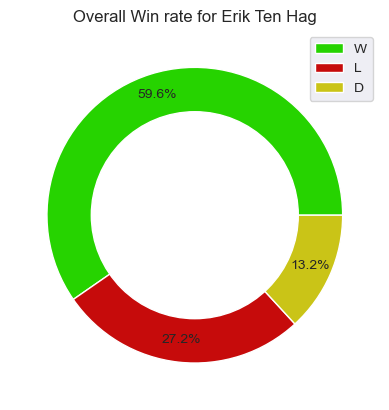

In [21]:
# overall win rate vizualization
plt.pie(eth_win_rate['ratio'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors = ['#26d300','#c60b0b','#cac417'])
plt.legend(eth_win_rate['Result'], loc = "upper right") 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Overall Win rate for Erik Ten Hag')
 
# Displaying Chart
plt.show()

In [22]:
# win ratio by competition

# Calculate the total number of matches for each competition
eth_by_competition = eth.groupby(['Competition','Result']).count().reset_index()
eth_by_competition = eth_by_competition[['Competition','Result','Date']]
eth_by_competition.rename(columns={'Date':'result_count'},inplace=True)
# total matches played by competition
eth_by_competition['matches_played'] = eth_by_competition.groupby('Competition')['result_count'].transform('sum')
# ratio df
eth_by_competition['result_ratio'] = eth_by_competition['result_count'] / eth_by_competition['matches_played'] * 100


eth_by_competition.sort_values(by=['Competition','Result'],ascending = False,inplace=True)
 
eth_by_competition

,Competition,Result,result_count,matches_played,result_ratio
12,UEFA Europa League,W,8,12,66.666667
11,UEFA Europa League,L,2,12,16.666667
10,UEFA Europa League,D,2,12,16.666667
9,UEFA Champions League,W,1,6,16.666667
8,UEFA Champions League,L,4,6,66.666667
7,UEFA Champions League,D,1,6,16.666667
6,Premier League,W,41,76,53.947368
5,Premier League,L,23,76,30.263158
4,Premier League,D,12,76,15.789474
3,League Cup,W,7,8,87.500000


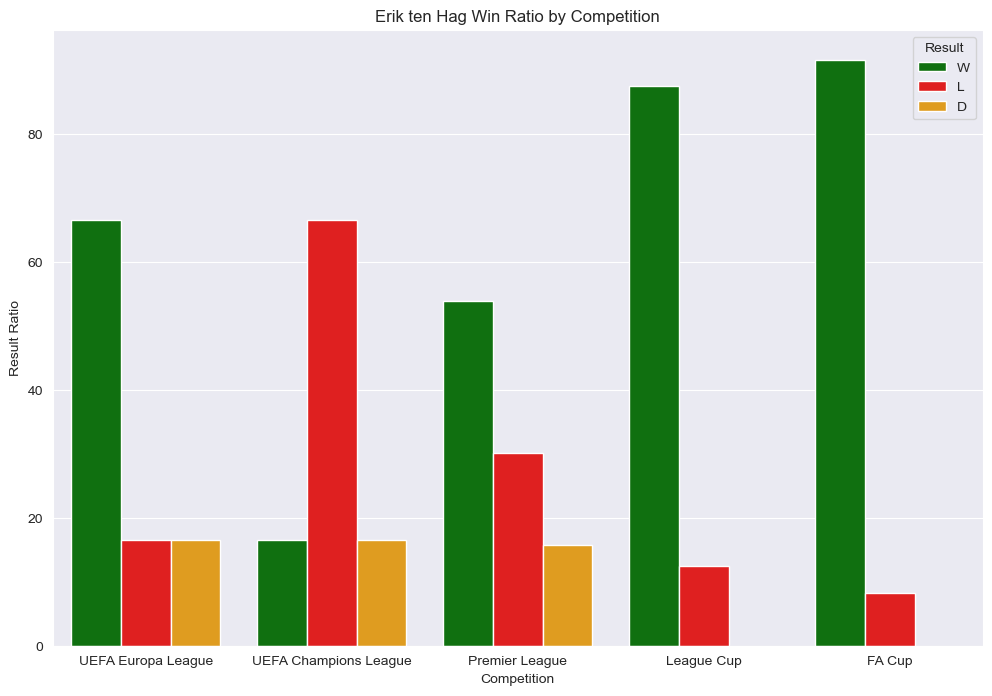

In [23]:
fig, ax = plt.subplots(figsize = (12,8))


sns.barplot(data = eth_by_competition[['Competition','Result','result_ratio']],
            x = 'Competition',
            y = 'result_ratio',
            hue = 'Result',
            palette = ['green','red','orange'])

ax.set_xlabel('Competition')
ax.set_ylabel('Result Ratio')
ax.set_title('Erik ten Hag Win Ratio by Competition')
plt.show()

### Biggest win and biggest loss

In [24]:
biggest_win = eth[eth['goal_difference'] == eth['goal_difference'].max()]
biggest_loss = eth[eth['goal_difference'] == eth['goal_difference'].min()]

In [25]:
biggest_win

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home,away,home_score,away_score,goal_difference
15,2034,2022-10-27,Manchester United v FC Sheriff Tiraspol,W,3-0,UEFA Europa League,Erik ten Hag,Manchester United,FC Sheriff Tiraspol,3,0,3
22,2041,2022-12-27,Manchester United v Nottingham Forest,W,3-0,Premier League,Erik ten Hag,Manchester United,Nottingham Forest,3,0,3
24,2043,2023-01-03,Manchester United v AFC Bournemouth,W,3-0,Premier League,Erik ten Hag,Manchester United,AFC Bournemouth,3,0,3
26,2045,2023-01-10,Manchester United v Charlton Athletic,W,3-0,League Cup,Erik ten Hag,Manchester United,Charlton Athletic,3,0,3
30,2049,2023-01-25,Nottingham Forest v Manchester United,W,0-3,League Cup,Erik ten Hag,Nottingham Forest,Manchester United,0,3,3
37,2056,2023-02-19,Manchester United v Leicester City,W,3-0,Premier League,Erik ten Hag,Manchester United,Leicester City,3,0,3
42,2061,2023-03-09,Manchester United v Real Betis,W,4-1,UEFA Europa League,Erik ten Hag,Manchester United,Real Betis,4,1,3
59,2078,2023-05-25,Manchester United v Chelsea,W,4-1,Premier League,Erik ten Hag,Manchester United,Chelsea,4,1,3
69,2088,2023-09-26,Manchester United v Crystal Palace,W,3-0,League Cup,Erik ten Hag,Manchester United,Crystal Palace,3,0,3
80,2099,2023-11-26,Everton v Manchester United,W,0-3,Premier League,Erik ten Hag,Everton,Manchester United,0,3,3


In [26]:
biggest_loss

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home,away,home_score,away_score,goal_difference
41,2060,2023-03-05,Liverpool v Manchester United,L,7-0,Premier League,Erik ten Hag,Liverpool,Manchester United,7,0,-7


### Goal Difference

In [27]:
def goal_diff(df: pd.DataFrame, team: str):
    goals_for = 0
    goals_against = 0
    n_games = df.shape[0]

    for idx in df.index:
        if df['home'].iloc[idx] == team:
            goals_for += df['home_score'].iloc[idx]
            goals_against += df['away_score'].iloc[idx]
        else:
            goals_for += df['away_score'].iloc[idx]
            goals_against += df['home_score'].iloc[idx]
    
    return goals_for, goals_against

n_games = eth.shape[0]
goals_for, goals_against = goal_diff(eth,'Manchester United')

print('goals in favour: ' + str(goals_for))
print('\ngoals against: ' + str(goals_against))

print('\ngoals in favour per match: ' + str(goals_for / n_games))
print('\ngoals against: ' + str(goals_against / n_games))

goals in favour: 196

goals against: 148

goals in favour per match: 1.719298245614035

goals against: 1.2982456140350878


In [28]:
print('average goal difference: '+ str(eth['goal_difference'].mean()))

average goal difference: 0.42105263157894735


## vs the big 6

In [29]:
big6 = 'Manchester City,Liverpool,Arsenal,Tottenham,Chelsea'.split(',')

eth_big6 = eth[(eth['home'].isin(big6)) | (eth['away'].isin(big6))]

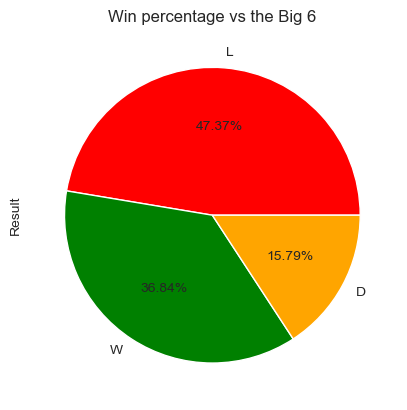

In [30]:
fig, ax = plt.subplots()

((eth_big6['Result'].value_counts() / len(eth_big6['Result']))*100).plot.pie(autopct = "%.2f%%", 
                                                                             colors=['red','green','orange'])


ax.set_title('Win percentage vs the Big 6')
plt.show()

## Initial thoughts 

Erik ten Hag has managed 2 seasons at Manchester United (as of 04-aug-2024). In this tenure, he has played 114 official matches. Out of these 114 matches, he has won 60%, lost 27% and drew 13%. The team has best played both in the FA cup and the Carabao Cup where he was won more than 80% of the matches played in these tournaments and winning the Carabao in his first season and the FA in his second. The worst performance came in the champions league where he lost the majority of the matches leaving with a humiliating 4th place finish in the group stages.


The biggest win has came with a goal difference of +3 with various 3-0 and 4-1 across many competitions, and his biggest loss came against Liverpool which he lost 7-0. 

Against the big 6 he as a win ratio of 37%, drew 16% of the times and lost 47% of the matches played.

Overall, in my opinion, ten Hag has shown a positive start to his tenure reaching 3 cup finals and 2 trophies in 2 years. Furthermore, he has an overall positive win ratio in the majority of the competitions he has played at (champions league being the only negative win record). 

However, the team has shown a lot of inconsistencies and being extremely defensively fragile with an average of 1.29 goals conceded per game (148 in total). In his defense, ETH has had a lot of external factors playing against him (INEOS takeover, the Mason Greenwood scandal, Jadon Sancho badmouthing him in social media, Cristiano Ronaldo departure and the historically injury riddled season that was 2023-2024). The positives have been really positive, but the negatives have also been extremely detrimental.

## ETH vs Other Manchester United Managers

In [31]:
def calculate_win_ratio_by_manager(df: pd.DataFrame):
    final_df = df.groupby(by=['manager','Result']).count().reset_index()[['manager','Result','Date']]
    # games played for each manager
    games_played = final_df.groupby(by='manager')['Date'].agg('sum')
    
    final_df = final_df.merge(games_played,left_on='manager',right_index=True)
    final_df.rename(columns={'Date_x':'count','Date_y':'total_games_played'},inplace=True)
    # W, L, D ratio
    final_df['ratio'] = final_df['count'] / final_df['total_games_played']
    
    
    return final_df

man_utd_manager_result_df = calculate_win_ratio_by_manager(manager_df)
man_utd_manager_result_df.head()

,manager,Result,count,total_games_played,ratio
0,Alex Ferguson,D,326,1499,0.217478
1,Alex Ferguson,L,271,1499,0.180787
2,Alex Ferguson,W,902,1499,0.601734
3,David Moyes,D,10,52,0.192308
4,David Moyes,L,15,52,0.288462


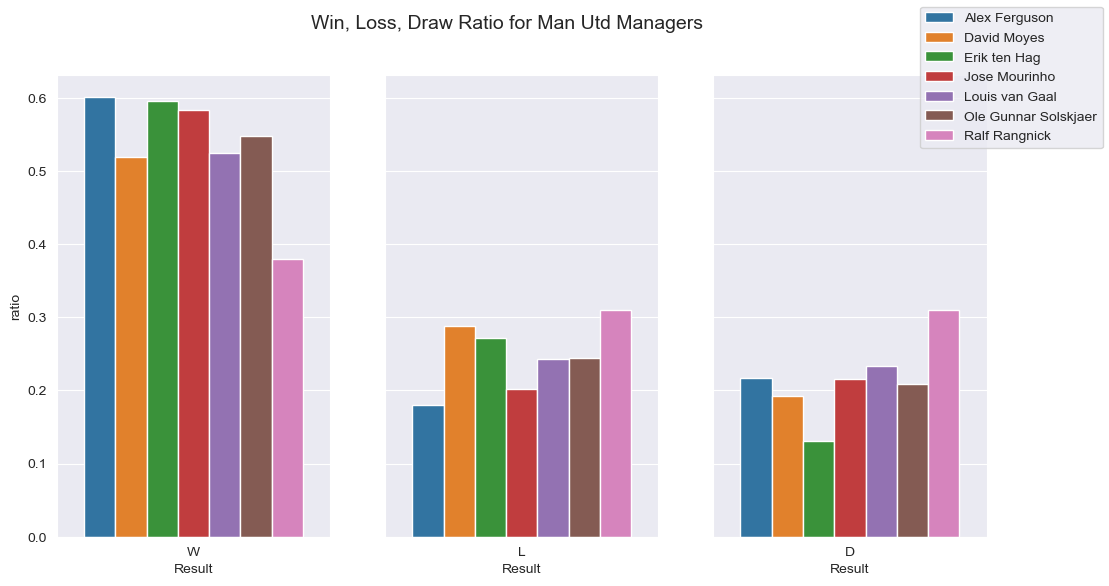

In [32]:
fig, ax = plt.subplots(1,3,sharey=True,figsize=(12,6))

sns.barplot(data=man_utd_manager_result_df[man_utd_manager_result_df['Result'] == 'W'],
           x='Result',
           y='ratio',
           hue='manager',
           ax=ax[0])
sns.barplot(data=man_utd_manager_result_df[man_utd_manager_result_df['Result'] == 'L'],
           x='Result',
           y='ratio',
           hue='manager',
           ax=ax[1])
sns.barplot(data=man_utd_manager_result_df[man_utd_manager_result_df['Result'] == 'D'],
           x='Result',
           y='ratio',
           hue='manager',
           ax=ax[2])    
    
# Remove individual legends
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

# Add a unified legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig = plt.gcf()
fig.suptitle("Win, Loss, Draw Ratio for Man Utd Managers", fontsize=14)

plt.show()

In [33]:
goal_diff_by_manager = pd.DataFrame(columns=['manager','goals_for','goals_against'])

for manager in manager_df['manager'].unique():
    goals_for, goals_against = goal_diff(manager_df[manager_df['manager'] == manager].reset_index(),'Manchester United') 
    goal_diff_by_manager.loc[len(goal_diff_by_manager)] = [manager,goals_for,goals_against]
    
goal_diff_by_manager = goal_diff_by_manager.merge(right = manager_df.groupby(by='manager').count()['Date'],
                                                                  left_on='manager',
                                                                  right_index=True)

goal_diff_by_manager.rename(columns={'Date':'total_games_played'},inplace=True)
goal_diff_by_manager['goal_difference'] = goal_diff_by_manager['goals_for'] -  goal_diff_by_manager['goals_against']
goal_diff_by_manager['goal_difference_per_match'] = goal_diff_by_manager['goal_difference'] / goal_diff_by_manager['total_games_played']

goal_diff_by_manager['goals_for_per_match'] = goal_diff_by_manager['goals_for'] / goal_diff_by_manager['total_games_played']
goal_diff_by_manager['goals_against_per_match'] = goal_diff_by_manager['goals_against'] / goal_diff_by_manager['total_games_played']
goal_diff_by_manager

,manager,goals_for,goals_against,total_games_played,goal_difference,goal_difference_per_match,goals_for_per_match,goals_against_per_match
0,Alex Ferguson,2764,1360,1499,1404,0.936624,1.843896,0.907272
1,David Moyes,91,59,52,32,0.615385,1.750000,1.134615
2,Louis van Gaal,158,98,103,60,0.582524,1.533981,0.951456
3,Jose Mourinho,244,121,144,123,0.854167,1.694444,0.840278
4,Ole Gunnar Solskjaer,308,183,168,125,0.744048,1.833333,1.089286
5,Ralf Rangnick,37,37,29,0,0.000000,1.275862,1.275862
6,Erik ten Hag,196,148,114,48,0.421053,1.719298,1.298246


C:\Users\USER\AppData\Local\Temp\ipykernel_6444\1382838159.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels, rotation=70)
C:\Users\USER\AppData\Local\Temp\ipykernel_6444\1382838159.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels, rotation=70)


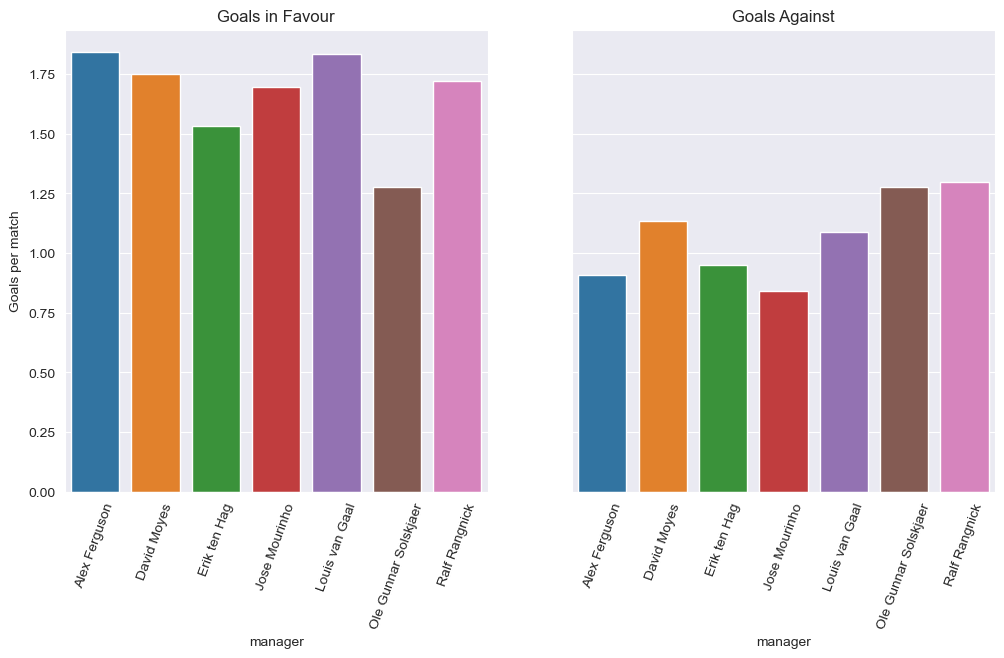

In [34]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))

sns.barplot(data=goal_diff_by_manager,x='manager',y='goals_for_per_match',ax=ax[0],hue='manager',legend=False)
sns.barplot(data=goal_diff_by_manager,x='manager',y='goals_against_per_match',ax=ax[1],hue='manager',legend=False)

ax[0].set_xticklabels(labels, rotation=70)
ax[0].set_title('Goals in Favour')

ax[1].set_xticklabels(labels, rotation=70)
ax[1].set_title('Goals Against')

ax[0].set_ylabel('Goals per match')


plt.show()

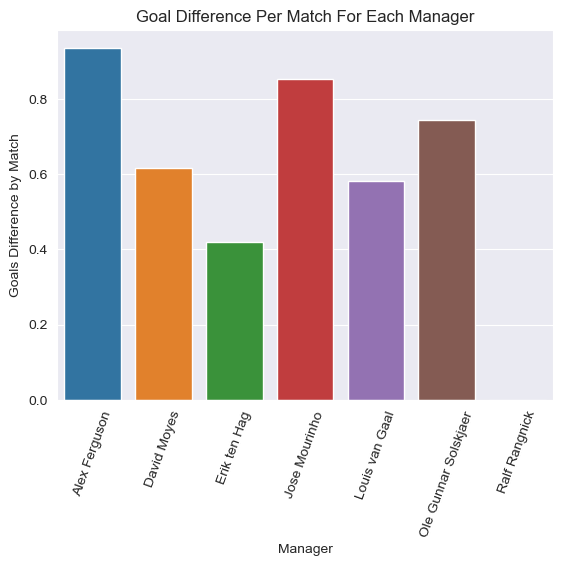

In [35]:
sns.barplot(data=goal_diff_by_manager.sort_values(by='manager'),x='manager',y='goal_difference_per_match',hue='manager',legend=False)
plt.ylabel('Goals Difference by Match')
plt.xlabel('Manager')
plt.title('Goal Difference Per Match For Each Manager')

plt.xticks(rotation=70)
plt.show()

## Comparison to Pep Guardiola, Jurgen Klopp and Mikel Arteta

### Importing data for each manager

In [36]:
pep_df = pd.read_csv('pep_df.csv')

pep_df[['home_score','away_score']] = pep_df['Score'].apply(split_scores).apply(pd.Series)
pep_df[['home','away']] = pep_df['Match'].str.split(pat = ' v ', n = 1, expand = True)

pep_df.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home_score,away_score,home,away
0,0,2016-08-13,Manchester City v Sunderland,W,2-1,Premier League,Pep Guardiola,2,1,Manchester City,Sunderland
1,1,2016-08-16,Steaua Bucuresti v Manchester City,W,0-5,UEFA Champions League,Pep Guardiola,0,5,Steaua Bucuresti,Manchester City
2,2,2016-08-20,Stoke City v Manchester City,W,1-4,Premier League,Pep Guardiola,1,4,Stoke City,Manchester City
3,3,2016-08-24,Manchester City v Steaua Bucuresti,W,1-0,UEFA Champions League,Pep Guardiola,1,0,Manchester City,Steaua Bucuresti
4,4,2016-08-28,Manchester City v West Ham United,W,3-1,Premier League,Pep Guardiola,3,1,Manchester City,West Ham United


In [37]:
klopp_df = pd.read_csv("klopp_df.csv")
klopp_df[['home_score','away_score']] = klopp_df['Score'].apply(split_scores).apply(pd.Series)
klopp_df[['home','away']] = klopp_df['Match'].str.split(pat = ' v ', n = 1, expand = True)

klopp_df.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home_score,away_score,home,away
0,0,2015-08-09,Stoke City v Liverpool,W,0-1,Premier League,Jurgen Klopp,0,1,Stoke City,Liverpool
1,1,2015-08-17,Liverpool v AFC Bournemouth,W,1-0,Premier League,Jurgen Klopp,1,0,Liverpool,AFC Bournemouth
2,2,2015-08-24,Arsenal v Liverpool,D,0-0,Premier League,Jurgen Klopp,0,0,Arsenal,Liverpool
3,3,2015-08-29,Liverpool v West Ham United,L,0-3,Premier League,Jurgen Klopp,0,3,Liverpool,West Ham United
4,4,2015-09-12,Manchester United v Liverpool,L,3-1,Premier League,Jurgen Klopp,3,1,Manchester United,Liverpool


In [38]:
arteta_df = pd.read_csv("arteta_df.csv")
arteta_df[['home_score','away_score']] = arteta_df['Score'].apply(split_scores).apply(pd.Series)
arteta_df[['home','away']] = arteta_df['Match'].str.split(pat = ' v ', n = 1, expand = True)

arteta_df.head()

,Unnamed: 0,Date,Match,Result,Score,Competition,manager,home_score,away_score,home,away
0,0,2019-08-11,Newcastle United v Arsenal,W,0-1,Premier League,Mikel Arteta,0,1,Newcastle United,Arsenal
1,1,2019-08-17,Arsenal v Burnley,W,2-1,Premier League,Mikel Arteta,2,1,Arsenal,Burnley
2,2,2019-08-24,Liverpool v Arsenal,L,3-1,Premier League,Mikel Arteta,3,1,Liverpool,Arsenal
3,3,2019-09-01,Arsenal v Tottenham Hotspur,D,2-2,Premier League,Mikel Arteta,2,2,Arsenal,Tottenham Hotspur
4,4,2019-09-15,Watford v Arsenal,D,2-2,Premier League,Mikel Arteta,2,2,Watford,Arsenal


### Win rate comparison

In [39]:
pep_win_rate = create_win_rate_df(pep_df)

klopp_win_rate = create_win_rate_df(klopp_df)

arteta_win_rate = create_win_rate_df(arteta_df)

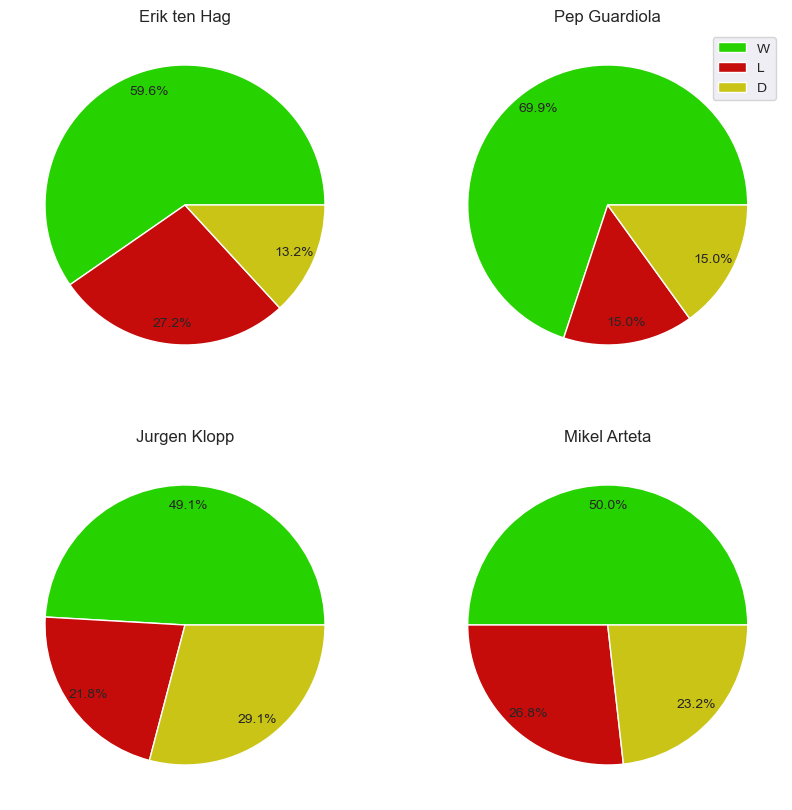

In [40]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0][0].pie(eth_win_rate['ratio'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors = ['#26d300','#c60b0b','#cac417'])
ax[0][0].set_title('Erik ten Hag')

ax[0][1].pie(pep_win_rate['ratio'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors = ['#26d300','#c60b0b','#cac417'])
ax[0][1].set_title('Pep Guardiola')
ax[0][1].legend(eth_win_rate['Result'], loc = "upper right")

ax[1][0].pie(klopp_win_rate['ratio'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors = ['#26d300','#c60b0b','#cac417'])
ax[1][0].set_title('Jurgen Klopp')


ax[1][1].pie(arteta_win_rate['ratio'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors = ['#26d300','#c60b0b','#cac417'])
ax[1][1].set_title('Mikel Arteta') 

plt.show()

### Goal Difference Comparison

In [41]:
goal_diff_rivals = pd.DataFrame(columns=['manager','goals_for','goals_against','total_games_played'])
teams = ['Manchester United','Manchester City','Liverpool','Arsenal']

for i, df in enumerate([eth, pep_df, klopp_df, arteta_df]):
    manager = df['manager'].iloc[0]
    team = teams[i]
    total_games_played = df.shape[0]
    goals_for, goals_against = goal_diff(df,team) 
    goal_diff_rivals.loc[len(goal_diff_rivals)] = [manager,goals_for,goals_against,total_games_played]

goal_diff_rivals.rename(columns={'Date':'total_games_played'},inplace=True)
goal_diff_rivals['goal_difference'] = goal_diff_rivals['goals_for'] -  goal_diff_rivals['goals_against']
goal_diff_rivals['goal_difference_per_match'] = goal_diff_rivals['goal_difference'] / goal_diff_rivals['total_games_played']

goal_diff_rivals['goals_for_per_match'] = goal_diff_rivals['goals_for'] / goal_diff_rivals['total_games_played']
goal_diff_rivals['goals_against_per_match'] = goal_diff_rivals['goals_against'] / goal_diff_rivals['total_games_played']
goal_diff_rivals

,manager,goals_for,goals_against,total_games_played,goal_difference,goal_difference_per_match,goals_for_per_match,goals_against_per_match
0,Erik ten Hag,196,148,114,48,0.421053,1.719298,1.298246
1,Pep Guardiola,265,106,113,159,1.407080,2.345133,0.938053
2,Jurgen Klopp,190,118,110,72,0.654545,1.727273,1.072727
3,Mikel Arteta,187,123,112,64,0.571429,1.669643,1.098214


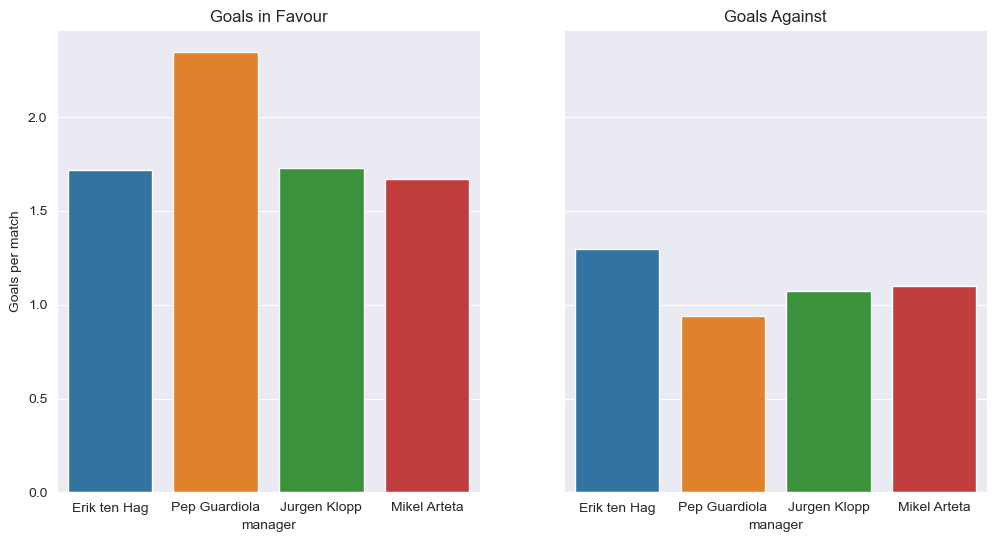

In [42]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))

sns.barplot(data=goal_diff_rivals,x='manager',y='goals_for_per_match',ax=ax[0],hue='manager',legend=False)
sns.barplot(data=goal_diff_rivals,x='manager',y='goals_against_per_match',ax=ax[1],hue='manager',legend=False)


ax[0].set_title('Goals in Favour')

ax[1].set_title('Goals Against')

ax[0].set_ylabel('Goals per match')
plt.show()

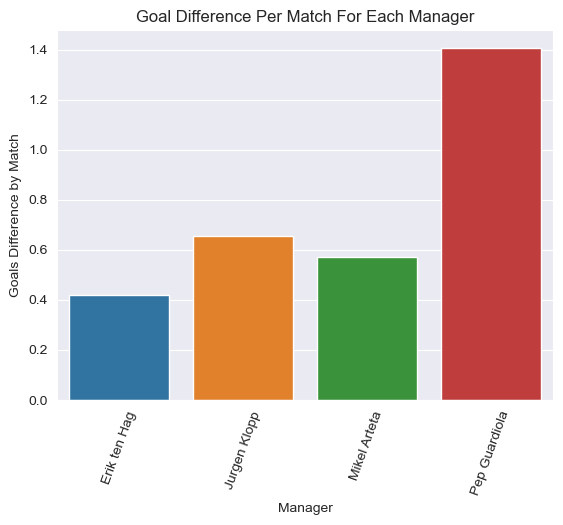

In [43]:
sns.barplot(data=goal_diff_rivals.sort_values(by='manager'),x='manager',y='goal_difference_per_match',hue='manager',legend=False)
plt.ylabel('Goals Difference by Match')
plt.xlabel('Manager')
plt.title('Goal Difference Per Match For Each Manager')

plt.xticks(rotation=70)
plt.show()

# Final Thoughts

Over his 2 years at Manchester United, Erik ten Hag has shown a lot of positive aspects but also some negative aspects. He inherited a demoralized, disjointed and dysfunctional team and transformed into a winning team that has reached 3 cup finals in 2 seasons and won 2 major trophies. He holds an overall winning ratio of 59.6% and a +0.4 goal difference per match ratio. The positives have been rejuvenating to see, with a better winning record since all of his predecessors excluding the iconic Sir Alex Ferguson. Comparing his first 2 seasons with the rival clubs (Man City, Liverpool, and Arsenal) Erik ten Hag has a better win ratio than Jurgen Klopp and Mikel Arteta.

However, his tenure has also come with some backfire. His loss ratio, sitting at 27.2% is the 2nd worst loss ratio of all Manchester United managers, and the worst out of Guardiola, Arteta and Klopp. These defensive fragilities are even more exposed with his goals conceded per match being greater than 1. His goal difference per match is the lowest out of all the managers analyzed, and this needs to be urgently fixed if ten Hag wants to compete for the premier league.


To summarize, ten Hag has shown a very bright 2 first seasons but these seasons have also come with a lot of inconsistency and variability. In his defense, there were multiple external factors such as the 45 injuries suffered in the 2023-2024 season, the Mason Greenwood resolution scandal, the Jadon Sancho social media backlash, Cristano Ronaldo explosive interview with Piers Morgan, that played against him. But, despite all these adversities, he has managed to end Man Utd's 6 year trophy drought, kept a positive winning record and started a project focused on growing youth talent. His biggest Achilles heel is the inconsistency and defensive fragility. Erik ten Hag's Manchester United is by far the worst team when it comes to goals conceded and his lose ratio is severely high. If he is to bring this club back to its former glory, a defensive stronghold and consistent style of play must be his number 1 priority.

Finally, to answer the question, is Erik ten Hag the right man for the job? In my opinion, yes. However, it must be stated that the path to greatness is not quick, simple or easy. This will be a long process with a lot of restructuring, trial and errors before seeing success. But, in these 2 seasons, it has made a long Manchester United fan look to the future with hope and excitement that we will be competing for the premier league in the years to come.

# Bibliography


[1]
Sky Sports, “Erik ten Hag: Manchester United appoint Ajax boss as new manager,” Sky Sports, Apr. 22, 2022. https://www.skysports.com/football/news/11667/12582098/erik-ten-hag-manchester-united-appoint-ajax-boss-as-new-manager

[2]
O. Garrick and A. Rampling, “Ratcliffe and INEOS’ minority stake in Man Utd confirmed,” The New York Times, Feb. 20, 2024. Accessed: Aug. 12, 2024. [Online]. Available: https://www.nytimes.com/athletic/5221120/2024/02/20/manchester-united-takeover-jim-ratcliffe/

[3]
M. Critchley, D. Sheldon, and more, “Inside Jadon Sancho’s exile and exit: What went wrong for him at Manchester United,” The New York Times, Jan. 11, 2024. Accessed: Aug. 12, 2024. [Online]. Available: https://www.nytimes.com/athletic/5181214/2024/01/11/inside-jadon-sanchos-exile-and-exit-what-went-wrong-for-him-at-manchester-united/

[4]
D. McDonnell and T. Blow, “Inside Sancho’s Man Utd exile as star prevented from mingling with team-mates,” The Mirror, Sep. 28, 2023. https://www.mirror.co.uk/sport/football/news/man-utd-sancho-ten-hag-31043622 (accessed Aug. 12, 2024).

[5]
S. Walsh, “Erik ten Hag lined up for sensational Ajax return - report,” 90min.com, Apr. 26, 2024. https://www.90min.com/erik-ten-hag-lined-up-sensational-ajax-return (accessed Aug. 12, 2024).

[6]
B. Cox, “Will Erik ten Hag be fired by Manchester United? Possible replacements, favourites if Red Devils sack manager,” Sportingnews.com, May 06, 2024. https://www.sportingnews.com/in/premier-league/news/erik-ten-hag-replacements-manchester-united-manager/f2f750000968120c0801e983 (accessed Aug. 12, 2024).

[7]
A. Mishra, “‘Destroyed Cristiano Ronaldo’s Time at Manchester United’- Erik ten Hag Slammed For ‘Clueless’ Attitude Towards Top Players,” EssentiallySports, Apr. 28, 2024. https://www.essentiallysports.com/soccer-football-news-destroyed-cristiano-ronaldo-time-at-manchester-united-erik-ten-hag-slammed-for-clueless-attitude-towards-top-players-piers-morgan/ (accessed Aug. 12, 2024).

[8]
ESPN, “Man United 2-0 Newcastle (26 Feb, 2023) Final Score - ESPN (UK),” ESPN, 2023. https://www.espn.co.uk/football/match/_/gameId/664857/newcastle-united-manchester-united (accessed Aug. 12, 2024).

[9]
The Football Association, “United win Emirates FA Cup,” www.thefa.com, 2023. https://www.thefa.com/news/2024/may/25/manchester-united-manchester-city-fa-cup-final-20240525 (accessed Aug. 12, 2024).

[10]
ESPN, “Man City 2-1 Man United (3 Jun, 2023) Final Score - ESPN (UK),” ESPN, Oct. 11, 2023. https://www.espn.co.uk/football/match/_/gameId/668583/manchester-united-manchester-city

[11]S. Saket, “‘One Year Ago Today’- Cristiano Ronaldo’s Bombshell Interview Before 2022 World Cup Reminded to the Fans by Piers Morgan,” EssentiallySports, Nov. 11, 2023. https://www.essentiallysports.com/soccer-football-news-one-year-ago-today-cristiano-ronaldo-bombshell-interview-before-world-cup-reminded-to-the-fans-by-piers-morgan/ (accessed Aug. 12, 2024).